論文<br>
https://arxiv.org/abs/2012.10296<br>
<br>
GitHub<br>
https://github.com/compphoto/BoostingMonocularDepth<br>
<br>
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/BoostingMonocularDepth_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境セットアップ

In [1]:
!nvidia-smi

## GithubからCode clone

In [2]:
%cd /src

!git clone https://github.com/compphoto/BoostingMonocularDepth.git

## ライブラリのインストール

In [2]:
pip install pillow matplotlib numpy torchvision opencv-contrib-python scikit-image torch

     |████████████████████████████████| 3.3 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 25.1 MB/s eta 0:00:01    |██████████████████████▏         | 8.0 MB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 67.9 MB 7.2 MB/s eta 0:00:011     |█████████████████████           | 44.7 MB 13.1 MB/s eta 0:00:02     |████████████████████████████    | 59.2 MB 7.2 MB/s eta 0:00:02
     |████████████████████████████████| 13.8 MB 21.0 MB/s eta 0:00:01    |████▏                           | 1.8 MB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 619.9 MB 4.3 kB/s  eta 0:00:01   |▍                               | 6.9 MB 20.6 MB/s eta 0:00:30     |██                              | 38.9 MB 13.1 MB/s eta 0:00:45     |██▋                             | 50.2 MB 17.5 MB/s eta 0:00:33     |████                            

## ライブラリのインポート

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'PIL'

# 学習済みモデルのセットアップ

In [4]:
%cd /app/src/BoostingMonocularDepth

# Download Merge model weights
!mkdir -p pix2pix/checkpoints/mergemodel/
!wget -c https://sfu.ca/~yagiz/CVPR21/latest_net_G.pth \
      -O pix2pix/checkpoints/mergemodel/latest_net_G.pth

# Download Midas model weights
!wget -c https://github.com/AlexeyAB/MiDaS/releases/download/midas_dpt/midas_v21-f6b98070.pt \
      -O midas/model.pt

# Download LeRes model weights
!wget -c https://cloudstor.aarnet.edu.au/plus/s/lTIJF4vrvHCAI31/download \
      -O res101.pth

/app/src/BoostingMonocularDepth
--2023-06-26 00:41:56--  https://sfu.ca/~yagiz/CVPR21/latest_net_G.pth
sfu.ca (sfu.ca) をDNSに問いあわせています... 142.58.228.150, 142.58.103.17, 142.58.103.137, ...
sfu.ca (sfu.ca)|142.58.228.150|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 301 Moved Permanently
場所: https://www.sfu.ca/~yagiz/CVPR21/latest_net_G.pth [続く]
--2023-06-26 00:41:56--  https://www.sfu.ca/~yagiz/CVPR21/latest_net_G.pth
www.sfu.ca (www.sfu.ca) をDNSに問いあわせています... 142.58.228.150
www.sfu.ca (www.sfu.ca)|142.58.228.150|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 416 Requested Range Not Satisfiable

    このファイルは既に全部取得しおわっています。何もすることはありません。

--2023-06-26 00:41:57--  https://github.com/AlexeyAB/MiDaS/releases/download/midas_dpt/midas_v21-f6b98070.pt
github.com (github.com) をDNSに問いあわせています... 20.27.177.113
github.com (github.com)|20.27.177.113|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 302 Found
場所: https://objects.githubusercontent.com/github-production-rele

# テスト画像のセットアップ
[使用画像](https://www.pakutaso.com/20170305066post-10557.html)

In [7]:
img_url = 'https://www.pakutaso.com/shared/img/thumb/pakuphoto39890PAR57308_TP_V.jpg' # @param {type:'string'}

In [17]:
%cd src/BoostingMonocularDepth

# ディレクトリ作成
!mkdir -p inputs
!mkdir -p outputs_midas
!mkdir -p outputs_leres

!wget -c {img_url} \
      -O inputs/test_01.jpg

/app/src/BoostingMonocularDepth
--2023-06-26 00:17:06--  https://www.pakutaso.com/shared/img/thumb/pakuphoto39890PAR57308_TP_V.jpg
www.pakutaso.com (www.pakutaso.com) をDNSに問いあわせています... 153.120.128.97, 153.120.128.97
www.pakutaso.com (www.pakutaso.com)|153.120.128.97|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 416 Requested Range Not Satisfiable

    このファイルは既に全部取得しおわっています。何もすることはありません。



# MiDas

In [18]:
!python3 run.py --Final --data_dir inputs --output_dir outputs_midas --depthNet 0

device: cuda
Namespace(data_dir='inputs', output_dir='outputs_midas', savepatchs=0, savewholeest=0, output_resolution=1, net_receptive_field_size=None, pix2pixsize=1024, depthNet=0, colorize_results=False, R0=False, R20=False, Final=True, max_res=inf)
----------------- Options ---------------
                    Final: True                          	[default: False]
                       R0: False                         
                      R20: False                         
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./pix2pix/checkpoints         
         colorize_results: False                         
                crop_size: 672                           
                 data_dir: inputs                        	[default: None]
                 dataroot: None                          
             dataset_mode: depthmerge                    
                 depthNet: 0       

Text(0.5, 1.0, 'midas output')

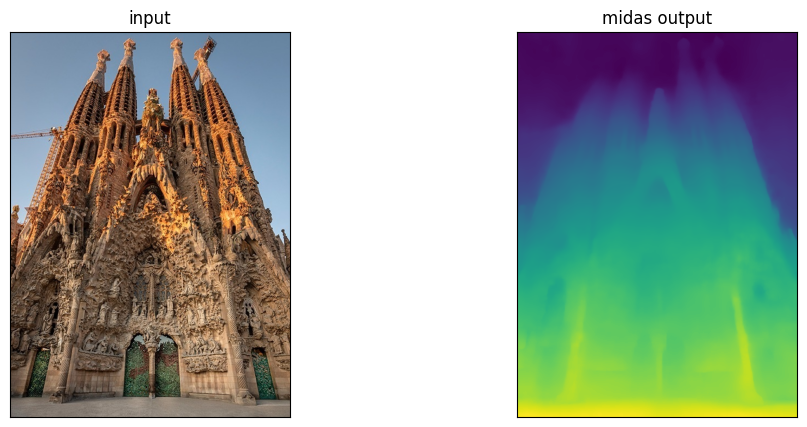

In [19]:
input = Image.open('./inputs/test_01.jpg')
midas_output = Image.open('./outputs_midas/test_01.png')

fig = plt.figure(num=None, figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.imshow(np.asarray(input))
ax.set_title('input')

ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.imshow(np.asarray(midas_output))
ax.set_title('midas output')

# LeRes

In [20]:
!python run.py --Final --data_dir ./inputs --output_dir  ./outputs_leres/ --depthNet 2

device: cuda
Namespace(data_dir='./inputs', output_dir='./outputs_leres/', savepatchs=0, savewholeest=0, output_resolution=1, net_receptive_field_size=None, pix2pixsize=1024, depthNet=2, colorize_results=False, R0=False, R20=False, Final=True, max_res=inf)
----------------- Options ---------------
                    Final: True                          	[default: False]
                       R0: False                         
                      R20: False                         
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./pix2pix/checkpoints         
         colorize_results: False                         
                crop_size: 672                           
                 data_dir: ./inputs                      	[default: None]
                 dataroot: None                          
             dataset_mode: depthmerge                    
                 depthNet: 2  

In [ ]:
input = Image.open('./inputs/test_01.jpg')
midas_output = Image.open('./outputs_leres/test_01.png')

fig = plt.figure(num=None, figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.imshow(np.asarray(input))
ax.set_title('input')

ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.imshow(np.asarray(midas_output))
ax.set_title('leres output')